# Neural Network in Keras -- a Case Study of the Fashion MNIST Dataset

This code is based the (more extensive) Keras classification tutorial at (https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb).

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images -- 60,000 for training and 10,000 for testing. Each image is of size 28 pixels by 28 pixels, and shows a piece of clothes -- see the example below.

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

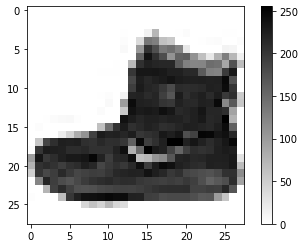

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Each image is represented by a 28x28 NumPy array, with pixel values ranging from 0 to 255. For example, the image above is presented as:

In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

These clothes belong to 10 categories/classes (so this is a 10-class prediction problem rather than a binary prediction problem). These 10 classes are:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(f"The image above has a target/label value of {train_labels[0]}.")
print(f"Therefore, it is an image of {class_names[train_labels[0]]}.")

The image above has a target/label value of 9.
Therefore, it is an image of Ankle boot.


Let's plot a few more for fun:

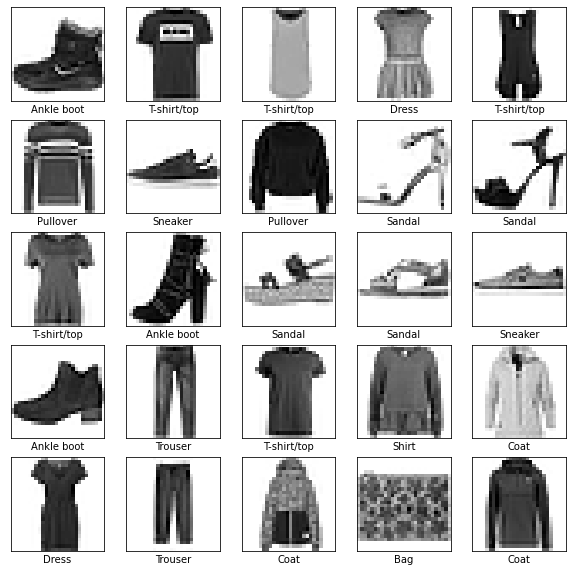

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Normalize the data

Modern NN prefers (and often requires) input data being normalized/standardized -- a topic related to how optimizers work and how regularization works. For bounded data such as this one where values range between 0 and 255, we need to normalize it so that it is within the range of 0 to 1. For this dataset, it means dividing the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

Two steps: 1. Set up the layers. 2. Compile the model.

### Set up the layers

Our goal today is to have a basic feel of how to build a NN model using Keras. We will gradually learn more of the Keras package and related programming details.

In [10]:
#three layers,flatten to 784 length long string
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #flatten to 784 length long string,menas 784 outputs, 
    #and 784 outputs are weighted sum together and feed in each neuro at the dense layer
    keras.layers.Dense(128, activation='relu'), #128 neuors in the dense layer
    keras.layers.Dense(10, activation='softmax') #For categorical prediction with J possible outcomes: softmax
])

2021-11-09 19:08:53.666634: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of shape (28, 28)) to a one-dimensional array (of shape (784)). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second `Dense` layer has 10 nodes. Notice that these two dense layers use different activation functions (why?).

In [25]:
#q(d+l)+(q+l)
128*(784+10)+(128+10)

101770

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# keras.utils.plot_model(model, show_shapes=True)

### Compile the model

The model's *compile* step allows us to specify the *loss function*, the *optimizer*, and the *metrics*:

In [13]:
model.compile(optimizer='adam',
              #if there are two types(binary prediction),replace SparseCatrgoricalCrossentropy with BinaryCrossentropy
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

In [14]:
model.fit(train_images, train_labels, epochs=10) #epochs=10,random set(non reason),a epcho means a full circle goes from input to weight update

2021-11-09 20:09:55.954070: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4974 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3755 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3394 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3153 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2464 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

As the model trains, the loss and accuracy metrics (of every epoch) are displayed. This model reaches an accuracy of about 93.0% on the training dataset.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'\nTest accuracy: {test_acc:.4}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8831

Test accuracy: 0.8831


The accuracy on the test dataset, 88.86% (you might get a slightly different value due to randomness in keras training), is only slightly less than the accuracy on the training dataset. Therefore, overfitting is not a significant concern in this model.

## Make predictions

Now we can use the NN we trained to make predictions. Let's just use the test dataset to practice prediction. Recall that we have 10,000 images in the test dataset. We use `keras.Sequential.predict()` for prediction:

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions.shape #we have ten choices

(10000, 10)

Because this is a 10-class prediction problem (i.e., the target variable has 10 possible values), each prediction is a Numpy array with 10 elements. For example, this is the prediction of the first image in the test dataset:

### we are 99.39% sure that predictions[0] belongs to type 9:ankle boot

In [18]:
predictions[0] #the probability that the picture belongs to this item

array([3.6331880e-07, 1.2903433e-11, 2.9291565e-09, 2.2724708e-12,
       7.9676807e-09, 8.7250381e-05, 6.3862835e-09, 5.9436494e-03,
       4.6763368e-08, 9.9396873e-01], dtype=float32)

In above, the first number represents the probability that this image belongs to class 0 (i.e., is a 'T-shirt/top'), the second number represents the probability that this image belongs to class 1 (i.e., is a 'Trouser'), and so on.

Therefore, the point prediction is just the class value that receives the highest probability:

In [20]:
point_predictions = predictions.argmax(1)
point_predictions

array([9, 2, 1, ..., 8, 1, 5])

Are we doing a good job predicting what's in the first image?

In [21]:
print(f"Our trained NN model predicts that the first test image is a(an) {class_names[point_predictions[0]]}.")
print(f"The ground truth is a(an) {class_names[test_labels[0]]}.")

verdict = 'correct' if point_predictions[0]==test_labels[0] else 'incorrect'
print(f"Therefore, the prediction of this first image is {verdict}.")

Our trained NN model predicts that the first test image is a(an) Ankle boot.
The ground truth is a(an) Ankle boot.
Therefore, the prediction of this first image is correct.


In [22]:
# We already got test accuracy earlier using `evaluate()`. 
# Here we can get the same number using the familiar `accuracy_score()`.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels, point_predictions)
print(f'Test accuracy: {accuracy:.4}')

Test accuracy: 0.8847


(**Not required for our course**) Below are codes for more visually-appealing predictions for the first 15 records:

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

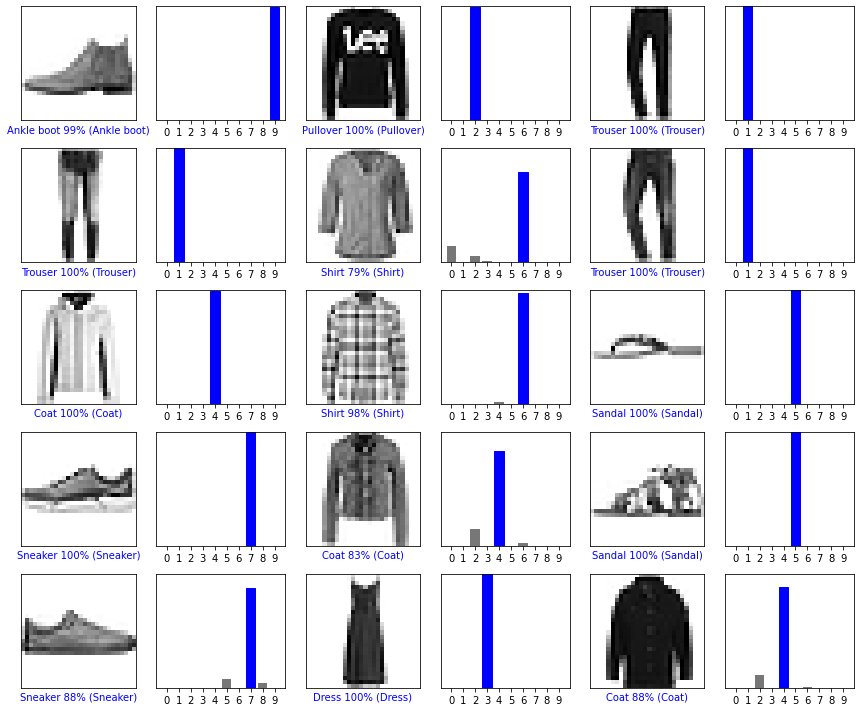

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()